In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from multiprocessing import *
from matplotlib.ticker import StrMethodFormatter
from DarkNews import plot_tools as pt

In [4]:
data_enu

,mzprime,m5,m4,delta,v_mu5,epsilon,decay_length,chi2_mb_fhc,chi2_mb_rhc,chi2_mb_comb,mb_fhc_n_events,mb_rhc_n_events,sbnd_n_events,microb_n_events,icarus_n_events
0,0.2,0.02894,0.007235,3.0,0.000002,0.0008,955.36370,31.80193,22.88791,69.23323,8.982750e-04,4.467863e-04,1.141832e-03,2.290561e-02,8.494726e-02
1,0.2,0.02894,0.007235,3.0,0.000002,0.0008,955.36370,31.80191,22.88787,69.23317,1.352374e-03,5.955456e-04,1.488445e-03,2.985881e-02,1.107338e-01
2,0.2,0.02894,0.007235,3.0,0.000003,0.0008,955.36370,31.80188,22.88780,69.23305,1.597766e-03,8.315928e-04,1.940276e-03,3.892273e-02,1.443480e-01
3,0.2,0.02894,0.007235,3.0,0.000003,0.0008,955.36370,31.80188,22.88777,69.23306,1.798818e-03,9.683144e-04,2.529264e-03,5.073807e-02,1.881662e-01
4,0.2,0.02894,0.007235,3.0,0.000003,0.0008,955.36370,31.80173,22.88769,69.23282,2.437706e-03,1.320796e-03,3.297045e-03,6.614007e-02,2.452857e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.8,0.21540,0.053850,3.0,0.647184,0.0008,10.35418,324.03390,612.02770,1093.76400,1.358966e+06,7.710242e+06,5.277025e+06,2.750014e+07,2.921719e+08
23996,0.8,0.21540,0.053850,3.0,0.763583,0.0008,10.35418,324.99540,612.09640,1094.02100,1.808525e+06,1.099436e+07,7.345911e+06,3.828171e+07,4.067194e+08
23997,0.8,0.21540,0.053850,3.0,0.913150,0.0008,10.35418,325.69150,612.12890,1094.38200,2.843452e+06,1.437307e+07,1.050553e+07,5.474742e+07,5.816573e+08
23998,0.8,0.21540,0.053850,3.0,1.115555,0.0008,10.35418,326.63840,612.16790,1094.63300,3.920446e+06,2.256807e+07,1.567890e+07,8.170741e+07,8.680905e+08


/tmp/ipykernel_36937/759267150.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_enu = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)
/tmp/ipykernel_36937/759267150.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_enu = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)
/tmp/ipykernel_36937/759267150.py:11: 

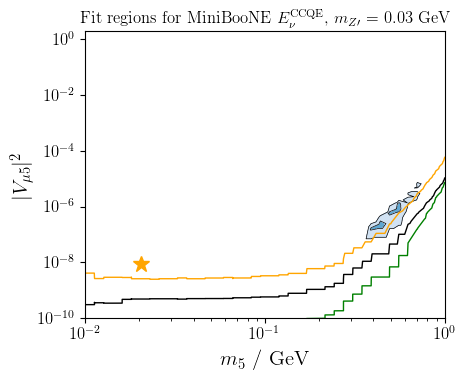

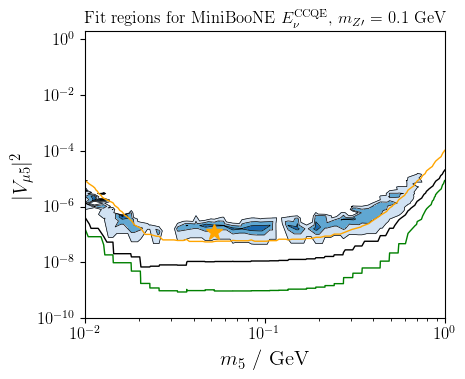

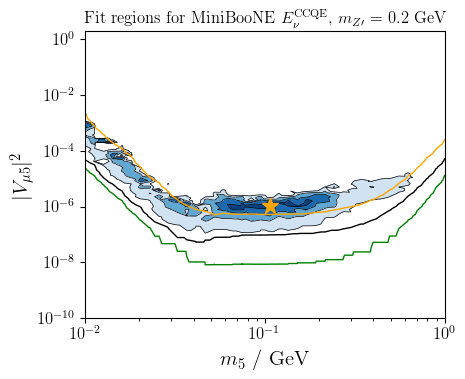

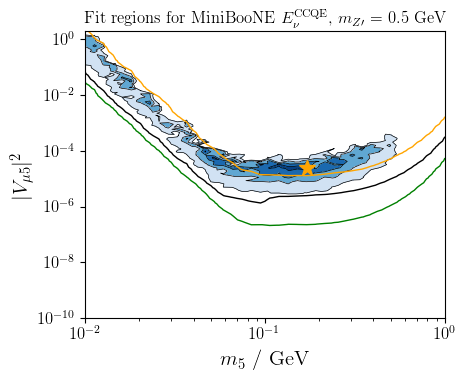

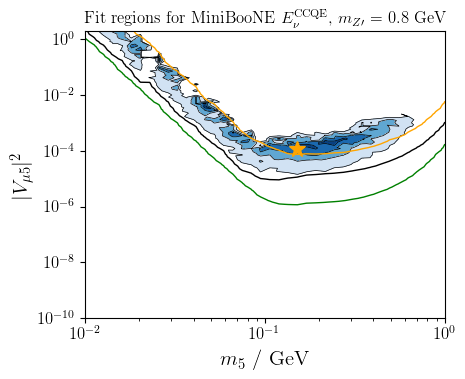

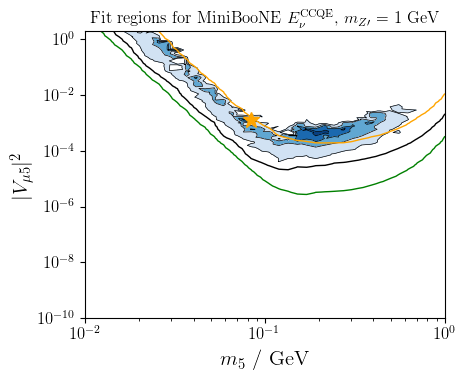

In [15]:
mzprimearray = [0.03, 0.1, 0.2, 0.5, 0.8, 1]
chi2 = "chi2_mb_fhc"
for i in range(len(mzprimearray)):
    mzprime = mzprimearray[i]
    coup_factor = 1
    # PATH
    path = '../results/3p2_coupling_0.0008_delta_3.00/'
    path_data = path+f'5m_15d_23h_16m_11s_'
    f = open(path_data+'chi2.dat', 'r')
    header = f.readline().replace('# ', '').split()
    data_enu = pd.read_csv(f, sep='\s+', names=header, dtype=np.float)
    data_enu = data_enu[data_enu[chi2] >= 0]
    data_enu = data_enu[(data_enu.mzprime == mzprime)]
    # levels = [0,2.3,6.18,11.83]
    levels = [0,2.30,6.18,11.83,19.33]
    chi2_min_enu = data_enu[chi2].min()
    min_enu = data_enu[data_enu[chi2] == chi2_min_enu]
    xmin_enu, ymin_enu = min_enu['m5'].values, min_enu['v_mu5'].values
    ymin_enu *= ymin_enu * coup_factor

    X = data_enu.m5.values
    Y = data_enu.v_mu5.values
    Y = Y * Y * coup_factor
    Z = (data_enu[chi2] - chi2_min_enu)
    W = data_enu.decay_length.values
    xlabel = r'$m_5 \ /$ GeV'
    ylabel = r'$|V_{\mu 5}|^2$'
    marker1 = '*'

    fig, ax = pt.std_fig()

    cs = ax.tricontourf(X,Y,Z,levels=levels,cmap='Blues_r')
    cs2 = ax.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)

    cs2 = ax.tricontour(X,Y,data_enu['sbnd_n_events'], levels=[1000], colors='orange',linewidths=1.0)
    cs2 = ax.tricontour(X,Y,data_enu['microb_n_events'], levels=[1000], colors='black',linewidths=1.0)
    cs2 = ax.tricontour(X,Y,data_enu['icarus_n_events'], levels=[1000], colors='green',linewidths=1.0)

    for c in cs.collections:
        c.set_rasterized(True)
    for c in cs2.collections:
        c.set_rasterized(True)

    dec_levels_0 = [0.0001,0.1,1,100,1000,100000,10000000]
    dict_lev_0 = {0.0001: r'1$\mu$m',0.1:r'1mm',1: r'1cm',100: r'1m',1000: r'10m',100000:r'1km',10000000:r'100km'}
    dec_levels = [0.0001,0.1,1,100,1000,100000,10000000]
    dict_lev = {0.0001: r'1$\mu$m',0.1:r'1mm',1: r'1cm',100: r'1m',1000: r'10m',100000:r'1km',10000000:r'100km'}
    ax.plot(xmin_enu,ymin_enu,color='orange',marker=marker1,markersize=12)

    ax.set_title(r'Fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$, ' + r'$m_{Z\prime} =$ ' + fr'{mzprime} GeV',fontsize=12)
    ax.set_xlabel(xlabel,fontsize=15)
    ax.set_ylabel(ylabel,fontsize=15)
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(X.min(),X.max()*1.)
    ax.set_ylim(1e-10,Y.max())

    fig.savefig(f'fit_3p2_couplings_sbn_{mzprime:.2e}_{chi2}.png', bbox_inches='tight', dpi=400)

### Enu, $m_{Z'}$ = 800 MeV

In [42]:
mzcase = 2
mzprime = mzprimearray[mzcase]

coup_factor = 1e4

data_enu = pd.read_csv(path_data,sep='\t')
data_enu = data_enu[data_enu.mzprime == mzprime]

data_enu_sbn = pd.read_csv(path_data_sbn,sep='\t')
data_enu_sbn = data_enu_sbn[(data_enu_sbn.mzprime == mzprime)]

plot_path_jpg = path +f'plots/fit_3p1_couplings_mz_{mzprime}_sbn.jpg'
plot_path_pdf = path +f'plots/fit_3p1_couplings_mz_{mzprime}_sbn.pdf'


viridis = cm.get_cmap('viridis', 12)
bar_1 = mpatches.Patch(color=viridis(range(12))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(12))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(12))[8], label=r'3 $\sigma$')

levels = [0,2.3,6.18,11.83]
chi2_min_enu = data_enu.chi2.min()
min_enu = data_enu[data_enu.chi2 == chi2_min_enu]
xmin_enu, ymin_enu = min_enu['m4'].values, min_enu['v_mu4'].values
ymin_enu *= ymin_enu * coup_factor

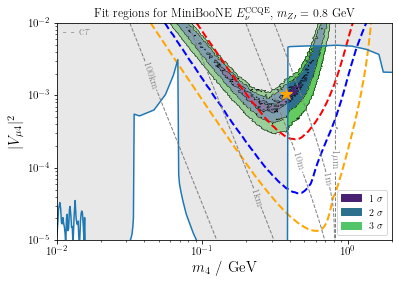

<Figure size 432x288 with 0 Axes>

In [57]:
icarus_factor = (47./60.)**2

m4_in_MeV, UmuNSQR = np.load("Umu4_inv.npy")
m4_lim = m4_in_MeV/1000.
UmuNSQR = np.sqrt(UmuNSQR)

data_enu = data_enu[data_enu.chi2>0]

X = data_enu.m4.values
Y = data_enu.v_mu4.values
Y = Y * Y * coup_factor
Z = (data_enu.chi2.values - chi2_min_enu)
W = data_enu.decay_length.values

X2 = data_enu_sbn.m4.values
Y2 = vmu4_f(data_enu_sbn.u_mu4.values)
Y2 = Y2 * Y2 * coup_factor
Z_mub = data_enu_sbn.n_muB.values
Z_icarus = data_enu_sbn.n_icarus.values * icarus_factor
Z_sbnd = data_enu_sbn.n_sbnd.values

mask_lim = (UmuNSQR < 1./np.sqrt(2))
m4_lim = m4_lim[mask_lim]
UmuNSQR = UmuNSQR[mask_lim]
vmu4_lim = vmu4_f(UmuNSQR) * vmu4_f(UmuNSQR) * coup_factor


xlabel = r'$m_4 \ /$ GeV'
ylabel = r'$|V_{\mu 4}|^2$'
marker1 = '*'

plt.rcParams["figure.figsize"] = (6,4)

cs = plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
cs2 = plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
cs3 = plt.tricontour(X2,Y2,Z_mub,levels=[1000],colors='red',linewidths=2.0, linestyles='dashed')
cs4 = plt.tricontour(X2,Y2,Z_icarus,levels=[1000],colors='blue',linewidths=2.0, linestyles='dashed')
cs5 = plt.tricontour(X2,Y2,Z_sbnd,levels=[1000],colors='orange',linewidths=2.0, linestyles='dashed')

for c in cs.collections:
    c.set_rasterized(True)
for c in cs2.collections:
    c.set_rasterized(True)
for c in cs3.collections:
    c.set_rasterized(True)
for c in cs4.collections:
    c.set_rasterized(True)
for c in cs5.collections:
    c.set_rasterized(True)

limits = plt.plot(m4_lim, vmu4_lim, label=fr"model-independent limits")
plt.fill_between(m4_lim, vmu4_lim, np.ones(np.size(m4_lim))*coup_factor, fc='lightgrey', ec='None', lw =0.0, alpha=0.5)

dec_levels_0 = [0.0001,0.001,0.1,1,100,1000,100000,10000000]
dict_lev_0 = {0.0001: r'1$\mu$m',0.001: r'10$\mu$m',0.1:r'1mm',1: r'1cm',100: r'1m',1000: r'10m',100000:r'1km',10000000:r'100km'}

dec_levels = [0.0001,100,1000,100000,10000000]
dict_lev = {0.0001: r'1$\mu$m',100: r'1m',1000: r'10m',100000:r'1km',10000000:r'100km'}

pos = 5
posb = 1
posc = 1
decay = plt.tricontour(X,Y,W,levels=[dec_levels[0]],colors='gray',linewidths=1.0,linestyles='dashed')
decay2 = plt.tricontour(X,Y,W,levels=[dec_levels[1]],colors='gray',linewidths=1.0,linestyles='dashed')
decay3 = plt.tricontour(X,Y,W,levels=[dec_levels[2]],colors='gray',linewidths=1.0,linestyles='dashed')
decay4 = plt.tricontour(X,Y,W,levels=[dec_levels[3]],colors='gray',linewidths=1.0,linestyles='dashed')
decay5 = plt.tricontour(X,Y,W,levels=[dec_levels[4]],colors='gray',linewidths=1.0,linestyles='dashed')

plt.text(0.011, 70, r'- - c$\tau$', color='gray',fontsize=12,ma='left')

plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker1,markersize=12)
plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc='lower right')
plt.title(r'Fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$, ' + r'$m_{Z\prime} =$ ' + fr'{mzprime} GeV',fontsize=12)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')

positions = [(0.82,1.3),(0.7,0.7),(0.3,1.0),(0.25,0.4),(0.05,20)]
plt.clabel(decay, decay.levels, inline=True, inline_spacing=-3,manual=[positions[0]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay2, decay2.levels, inline=True, inline_spacing=-3,manual=[positions[1]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay3, decay3.levels, inline=True, inline_spacing=-3,manual=[positions[2]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay4, decay4.levels, inline=True, inline_spacing=-4,manual=[positions[3]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay5, decay5.levels, inline=True, inline_spacing=-6,manual=[positions[4]], use_clabeltext=True,fmt=dict_lev, fontsize=10)

plt.xlim(X.min(),X.max()*1.)
#plt.ylim(Y.min(),Y.max())
plt.ylim(1e-1,Y.max())
yt = 10.**np.arange(-1,3)
yl = [r'$10^{-5}$',r'$10^{-4}$',r'$10^{-3}$',r'$10^{-2}$']
plt.yticks(ticks=yt,labels=yl)

plt.savefig(plot_path_jpg,dpi=400)
#plt.savefig(plot_path_pdf,dpi=400)
plt.show()
plt.clf()

### Enu, $m_{Z'}$ = 200 MeV

In [58]:
mzcase = 1
mzprime = mzprimearray[mzcase]

coup_factor = 1e6

data_enu = pd.read_csv(path_data,sep='\t')
data_enu = data_enu[data_enu.mzprime == mzprime]

data_enu_sbn = pd.read_csv(path_data_sbn,sep='\t')
data_enu_sbn = data_enu_sbn[(data_enu_sbn.mzprime == mzprime)]

plot_path_jpg = path +f'plots/fit_3p1_couplings_mz_{mzprime}_sbn.jpg'
plot_path_pdf = path +f'plots/fit_3p1_couplings_mz_{mzprime}_sbn.pdf'

viridis = cm.get_cmap('viridis', 12)
bar_1 = mpatches.Patch(color=viridis(range(12))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(12))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(12))[8], label=r'3 $\sigma$')

levels = [0,2.3,6.18,11.83]
chi2_min_enu = data_enu.chi2.min()
min_enu = data_enu[data_enu.chi2 == chi2_min_enu]
xmin_enu, ymin_enu = min_enu['m4'].values, min_enu['v_mu4'].values
ymin_enu *= ymin_enu * coup_factor

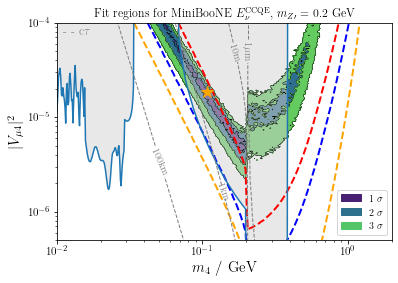

<Figure size 432x288 with 0 Axes>

In [73]:
icarus_factor = (47./60.)**2

m4_in_MeV, UmuNSQR = np.load("Umu4_inv.npy")
m4_lim = m4_in_MeV/1000.
UmuNSQR = np.sqrt(UmuNSQR)

data_enu = data_enu[data_enu.chi2>0]

X = data_enu.m4.values
Y = data_enu.v_mu4.values
Y = Y * Y * coup_factor
Z = (data_enu.chi2.values - chi2_min_enu)
W = data_enu.decay_length.values

X2 = data_enu_sbn.m4.values
Y2 = vmu4_f(data_enu_sbn.u_mu4.values)
Y2 = Y2 * Y2 * coup_factor
Z_mub = data_enu_sbn.n_muB.values
Z_icarus = data_enu_sbn.n_icarus.values * icarus_factor
Z_sbnd = data_enu_sbn.n_sbnd.values

mask_lim = (UmuNSQR < 1./np.sqrt(2))
m4_lim = m4_lim[mask_lim]
UmuNSQR = UmuNSQR[mask_lim]
vmu4_lim = vmu4_f(UmuNSQR) * vmu4_f(UmuNSQR) * coup_factor

xlabel = r'$m_4 \ /$ GeV'
ylabel = r'$|V_{\mu 4}|^2$'
marker1 = '*'

plt.rcParams["figure.figsize"] = (6,4)

cs = plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
cs2 = plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
cs3 = plt.tricontour(X2,Y2,Z_mub,levels=[1000],colors='red',linewidths=2.0, linestyles='dashed')
cs4 = plt.tricontour(X2,Y2,Z_icarus,levels=[1000],colors='blue',linewidths=2.0, linestyles='dashed')
cs5 = plt.tricontour(X2,Y2,Z_sbnd,levels=[1000],colors='orange',linewidths=2.0, linestyles='dashed')

for c in cs.collections:
    c.set_rasterized(True)
for c in cs2.collections:
    c.set_rasterized(True)
for c in cs3.collections:
    c.set_rasterized(True)
for c in cs4.collections:
    c.set_rasterized(True)
for c in cs5.collections:
    c.set_rasterized(True)

limits = plt.plot(m4_lim, vmu4_lim, label=fr"model-independent limits")
plt.fill_between(m4_lim, vmu4_lim, np.ones(np.size(m4_lim))*coup_factor, fc='lightgrey', ec='None', lw =0.0, alpha=0.5)

dec_levels_0 = [0.0001,0.001,0.1,1,100,1000,100000,10000000]
dict_lev_0 = {0.0001: r'1$\mu$m',0.001: r'10$\mu$m',0.1:r'1mm',1: r'1cm',100: r'1m',1000: r'10m',100000:r'1km',10000000:r'100km'}

dec_levels = [0.0001,1000,100000,10000000]
dict_lev = {0.0001: r'1$\mu$m',1000: r'10m',100000:r'1km',10000000:r'100km'}


dec_levels_b = [1e-1,1,1000,100000,10000000]
dict_lev_b = {1e-1:r'1mm',1: r'1cm',1000: r'10m',100000:r'1km',10000000:r'100km'}

test = 1e-1
#dec_levels_b = [test]
#dict_lev_b = {test: r'test'}
testc = 1e-2
#dec_levels_c = [testc]
#dict_lev_c = {testc: r'0.1mm'}
dict_lev_d = {testc: r'    '}


pos = 4
decay = plt.tricontour(X,Y,W,levels=[dec_levels[0]],colors='gray',linewidths=1.0,linestyles='dashed')
decay2 = plt.tricontour(X,Y,W,levels=[dec_levels[1]],colors='gray',linewidths=1.0,linestyles='dashed')
decay3 = plt.tricontour(X,Y,W,levels=[dec_levels[2]],colors='gray',linewidths=1.0,linestyles='dashed')
decay4 = plt.tricontour(X,Y,W,levels=[dec_levels[3]],colors='gray',linewidths=1.0,linestyles='dashed')

plt.text(0.011, 75, r'- - c$\tau$', color='gray',fontsize=12,ma='left')

plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker1,markersize=12)
plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc='lower right')
plt.title(r'Fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$, ' + r'$m_{Z\prime} =$ ' + fr'{mzprime} GeV',fontsize=12)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')

positions = [(0.2,50),(0.13,40),(0.11,1.3),(0.045,3)]
plt.clabel(decay, decay.levels, inline=True, inline_spacing=-6,manual=[positions[0]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay2, decay2.levels, inline=True, inline_spacing=-6,manual=[positions[1]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay3, decay3.levels, inline=True, inline_spacing=-7,manual=[positions[2]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay4, decay4.levels, inline=True, inline_spacing=-9,manual=[positions[3]], use_clabeltext=True,fmt=dict_lev, fontsize=10)

plt.xlim(X.min(),X.max()*1.)
#plt.ylim(Y.min(),Y.max())
plt.ylim(5e-1,Y.max())
yt = 10.**np.arange(0,3)
yl = [r'$10^{-6}$',r'$10^{-5}$',r'$10^{-4}$']
plt.yticks(ticks=yt,labels=yl)

#plt.savefig(plot_path_jpg,dpi=400)
plt.savefig(plot_path_pdf,dpi=400)
plt.show()
plt.clf()

### Enu, $m_{Z'}$ = 30 MeV

In [74]:
mzcase = 0
mzprime = mzprimearray[mzcase]

coup_factor = 1e8

data_enu = pd.read_csv(path_data,sep='\t')
data_enu = data_enu[data_enu.mzprime == mzprime]

data_enu_sbn = pd.read_csv(path_data_sbn,sep='\t')
data_enu_sbn = data_enu_sbn[(data_enu_sbn.mzprime == mzprime)]

plot_path_jpg = path +f'plots/fit_3p1_couplings_mz_{mzprime}_sbn.jpg'
plot_path_pdf = path +f'plots/fit_3p1_couplings_mz_{mzprime}_sbn.pdf'

viridis = cm.get_cmap('viridis', 12)
bar_1 = mpatches.Patch(color=viridis(range(12))[1], label=r'1 $\sigma$')
bar_2 = mpatches.Patch(color=viridis(range(12))[4], label=r'2 $\sigma$')
bar_3 = mpatches.Patch(color=viridis(range(12))[8], label=r'3 $\sigma$')

levels = [0,2.3,6.18,11.83]
chi2_min_enu = data_enu.chi2.min()
min_enu = data_enu[data_enu.chi2 == chi2_min_enu]
xmin_enu, ymin_enu = min_enu['m4'].values, min_enu['v_mu4'].values
ymin_enu *= ymin_enu * coup_factor

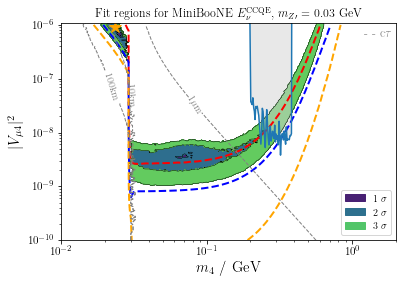

<Figure size 432x288 with 0 Axes>

In [88]:
icarus_factor = (47./60.)**2

m4_in_MeV, UmuNSQR = np.load("Umu4_inv.npy")
m4_lim = m4_in_MeV/1000.
UmuNSQR = np.sqrt(UmuNSQR)

data_enu = data_enu[data_enu.chi2>0]

Y = data_enu.v_mu4.values
Y = Y * Y * coup_factor
masky = Y <= 1000
X = data_enu.m4.values
Z = (data_enu.chi2.values - chi2_min_enu)
W = data_enu.decay_length.values


X2 = data_enu_sbn.m4.values
Y2 = vmu4_f(data_enu_sbn.u_mu4.values)
Y2 = Y2 * Y2 * coup_factor
Z_mub = data_enu_sbn.n_muB.values
Z_icarus = data_enu_sbn.n_icarus.values * icarus_factor
Z_sbnd = data_enu_sbn.n_sbnd.values

mask_lim = (UmuNSQR < 1./np.sqrt(2))
m4_lim = m4_lim[mask_lim]
UmuNSQR = UmuNSQR[mask_lim]
vmu4_lim = vmu4_f(UmuNSQR) * vmu4_f(UmuNSQR) * coup_factor

xlabel = r'$m_4 \ /$ GeV'
ylabel = r'$|V_{\mu 4}|^2$'
marker1 = '*'

plt.rcParams["figure.figsize"] = (6,4)

cs = plt.tricontourf(X,Y,Z,levels=levels,cmap='viridis')
cs2 = plt.tricontour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
cs3 = plt.tricontour(X2,Y2,Z_mub,levels=[1000],colors='red',linewidths=2.0, linestyles='dashed')
cs4 = plt.tricontour(X2,Y2,Z_icarus,levels=[1000],colors='blue',linewidths=2.0, linestyles='dashed')
cs5 = plt.tricontour(X2,Y2,Z_sbnd,levels=[1000],colors='orange',linewidths=2.0, linestyles='dashed')

for c in cs.collections:
    c.set_rasterized(True)
for c in cs2.collections:
    c.set_rasterized(True)
for c in cs3.collections:
    c.set_rasterized(True)
for c in cs4.collections:
    c.set_rasterized(True)
for c in cs5.collections:
    c.set_rasterized(True)

limits = plt.plot(m4_lim, vmu4_lim, label=fr"model-independent limits")
plt.fill_between(m4_lim, vmu4_lim, np.ones(np.size(m4_lim))*coup_factor, fc='lightgrey', ec='None', lw =0.0, alpha=0.5)

dec_levels_0 = [0.0001,0.001,0.1,1,100,1000,100000,10000000]
dict_lev_0 = {0.0001: r'1$\mu$m',0.001: r'10$\mu$m',0.1:r'1mm',1: r'1cm',100: r'1m',1000: r'10m',100000:r'1km',10000000:r'100km'}


dec_levels = [0.0001,1000000,10000000]
dict_lev = {0.0001: r'1$\mu$m',10000000:r'100km',1000000:r'10km'}


dec_levels_b = [1e-1,1,1000,100000,10000000]
dict_lev_b = {1e-1:r'1mm',1: r'1cm',1000: r'10m',100000:r'1km',10000000:r'100km'}

test = 1e-1
#dec_levels_b = [test]
#dict_lev_b = {test: r'test'}
testc = 1e-2
#dec_levels_c = [testc]
#dict_lev_c = {testc: r'0.1mm'}
dict_lev_d = {testc: r'    '}


pos = 3
decay = plt.tricontour(X[masky],Y[masky],W[masky],levels=[dec_levels[0]],colors='gray',linewidths=1.0,linestyles='dashed')
decay2 = plt.tricontour(X,Y,W,levels=[dec_levels[1]],colors='gray',linewidths=1.0,linestyles='dashed')
decay3 = plt.tricontour(X,Y,W,levels=[dec_levels[2]],colors='gray',linewidths=1.0,linestyles='dashed')

plt.text(1.2, 60, r'- - c$\tau$', color='gray',fontsize=12,ma='left')

plt.plot(xmin_enu,ymin_enu,color='orange',marker=marker1,markersize=12)
plt.legend(handles=[bar_1, bar_2, bar_3],fontsize=10,loc='lower right')
plt.title(r'Fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$, ' + r'$m_{Z\prime} =$ ' + fr'{mzprime} GeV',fontsize=12)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.xscale('log')
plt.yscale('log')

positions = [(0.1,4),(0.03,5),(0.02,7)]
plt.clabel(decay, decay.levels, inline=True, inline_spacing=-4,manual=[positions[0]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay2, decay2.levels, inline=True, inline_spacing=-4,manual=[positions[1]], use_clabeltext=True,fmt=dict_lev, fontsize=10)
plt.clabel(decay3, decay3.levels, inline=True, inline_spacing=-3,manual=[positions[2]], use_clabeltext=True,fmt=dict_lev, fontsize=10)

plt.xlim(X.min(),X.max()*1.)
#plt.ylim(Y.min(),Y.max())
plt.ylim(Y.min(),1.1e2)
#plt.ylim(1e-2,Y.max())
yt = 10.**np.arange(-2,3)
yl = [r'$10^{-10}$',r'$10^{-9}$',r'$10^{-8}$',r'$10^{-7}$',r'$10^{-6}$']
plt.yticks(ticks=yt,labels=yl)

plt.savefig(plot_path_jpg,dpi=400)
#plt.savefig(plot_path_pdf,dpi=400)
plt.show()
plt.clf()